<a href="https://colab.research.google.com/github/Kaizensk/Email-marketing-effectiveness-prediction/blob/main/ShwetaKumari_Capstone2_EmailEffectivenessPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [ ]:
# Read the csv data
path = "/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/capstone2/data_email_campaign.csv"
df = pd.read_csv(path)
df1 = pd.DataFrame(df)

In [ ]:
df1

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


In [ ]:
df1.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
df1.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [ ]:
df1.describe(include='all')

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00084569661680,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


In [ ]:
df1.shape

(68353, 12)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
df1.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [ ]:
df1.shape

(68353, 12)

In [ ]:
import numpy as np

ignored = len(df1[df1['Email_Status']==0])
read  = len(df1[df1['Email_Status']==1])
acknowledge = len(df1[df1['Email_Status']==2])

print("IGNORED:",ignored)
print("READ:",read)
print("Acknowledge:",acknowledge)

IGNORED: 54941
READ: 11039
Acknowledge: 2373


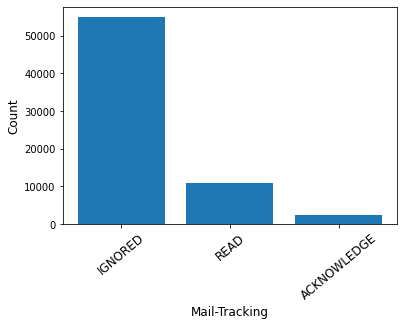

In [ ]:
labels = ['IGNORED','READ','ACKNOWLEDGE']
li = [ignored,read,acknowledge]

index = np.arange(len(labels))

plt.bar(index,li)
plt.xlabel('Mail-Tracking',fontsize =12)
plt.ylabel('Count',fontsize =12)
plt.xticks(index,labels,fontsize=12,rotation=40)
plt.show()

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


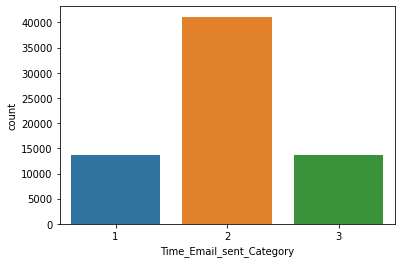

In [ ]:
sns.countplot(df1['Time_Email_sent_Category'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


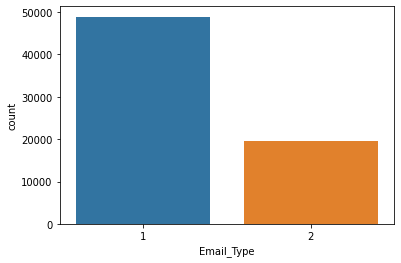

In [ ]:
sns.countplot(df1['Email_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


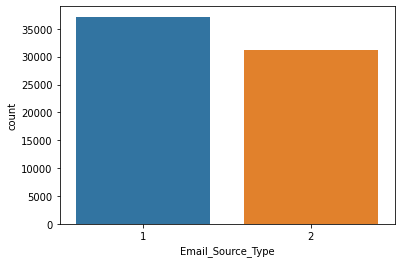

In [ ]:
sns.countplot(df1['Email_Source_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


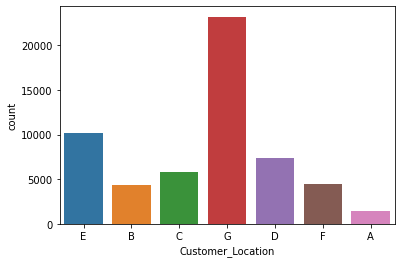

In [ ]:
sns.countplot(df1['Customer_Location'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


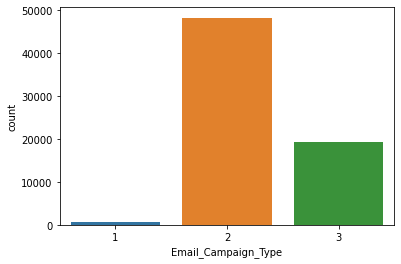

In [ ]:
sns.countplot(df1['Email_Campaign_Type'])

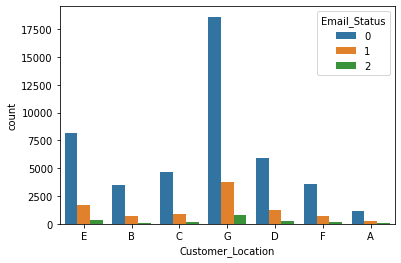

In [ ]:
sns.countplot(x='Customer_Location',hue='Email_Status', data=df1)

In [ ]:
print(df1.axes)
df1 =df1.drop(['Customer_Location','Email_ID'], axis = 1)
df1.shape

[RangeIndex(start=0, stop=68353, step=1), Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')]


(68353, 10)

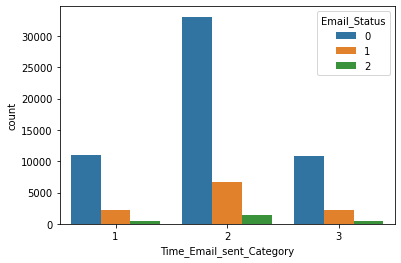

In [ ]:
sns.countplot(x='Time_Email_sent_Category',hue='Email_Status', data=df1)

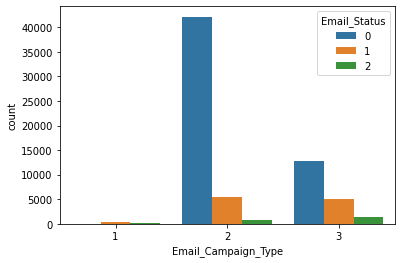

In [ ]:
sns.countplot(x='Email_Campaign_Type',hue='Email_Status', data=df1)

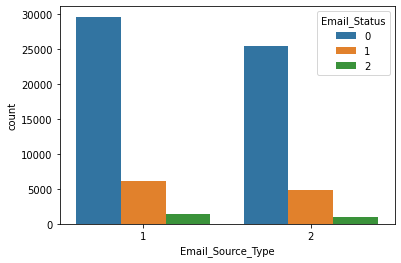

In [ ]:
sns.countplot(x='Email_Source_Type',hue='Email_Status', data=df1)

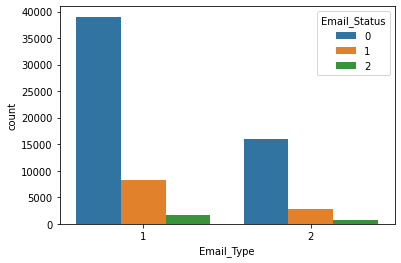

In [ ]:
sns.countplot(x='Email_Type',hue='Email_Status', data=df1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Email_Campaign_Type        68353 non-null  int64  
 4   Total_Past_Communications  61528 non-null  float64
 5   Time_Email_sent_Category   68353 non-null  int64  
 6   Word_Count                 68353 non-null  int64  
 7   Total_Links                66152 non-null  float64
 8   Total_Images               66676 non-null  float64
 9   Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.2 MB


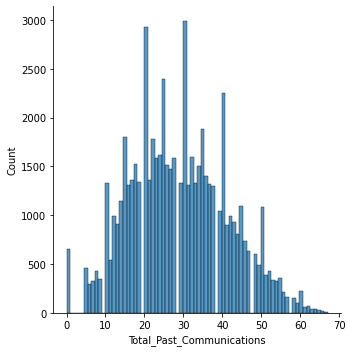

In [ ]:
sns.displot(df1['Total_Past_Communications'])


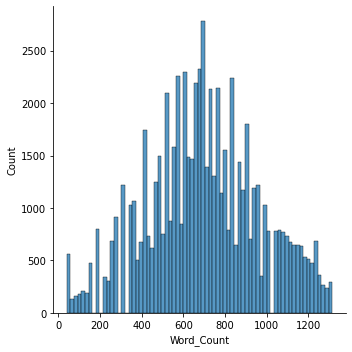

In [ ]:
sns.displot(df1['Word_Count'])

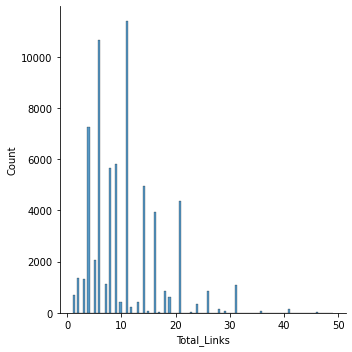

In [ ]:
sns.displot(df1['Total_Links'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


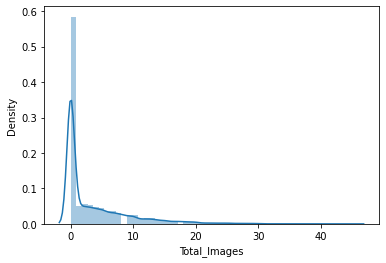

In [ ]:
sns.distplot(df1['Total_Images'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


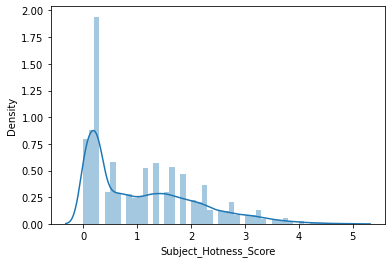

In [ ]:
sns.distplot(df1['Subject_Hotness_Score'])

In [ ]:
df1['Total_Links'] = df1['Total_Links'].fillna(df1['Total_Links'].mode()[0])

In [ ]:
df1['Total_Past_Communications'].fillna(int(df1['Total_Past_Communications'].mean()), inplace=True)

In [ ]:
df1['Total_Images'] = df1['Total_Images'].fillna(df1['Total_Images'].mode()[0])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Email_Campaign_Type        68353 non-null  int64  
 4   Total_Past_Communications  68353 non-null  float64
 5   Time_Email_sent_Category   68353 non-null  int64  
 6   Word_Count                 68353 non-null  int64  
 7   Total_Links                68353 non-null  float64
 8   Total_Images               68353 non-null  float64
 9   Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.2 MB


In [ ]:
df1.isnull().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


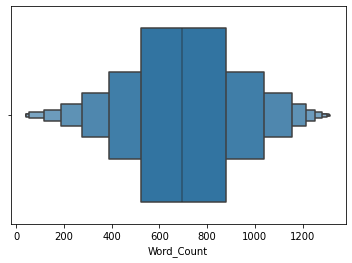

In [ ]:
sns.boxenplot(df1['Word_Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


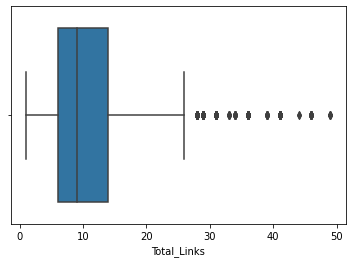

In [ ]:
sns.boxplot(df1['Total_Links'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


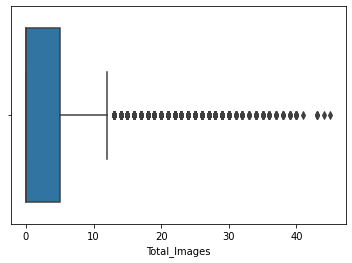

In [ ]:
sns.boxplot(df1['Total_Images'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


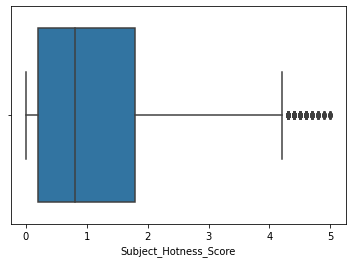

In [ ]:
sns.boxplot(df['Subject_Hotness_Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


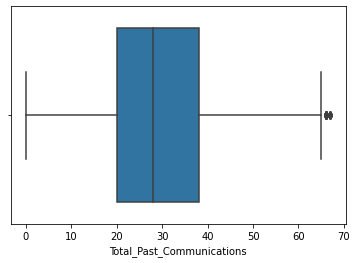

In [ ]:
sns.boxplot(df['Total_Past_Communications'])

In [ ]:
import scipy.stats as stats

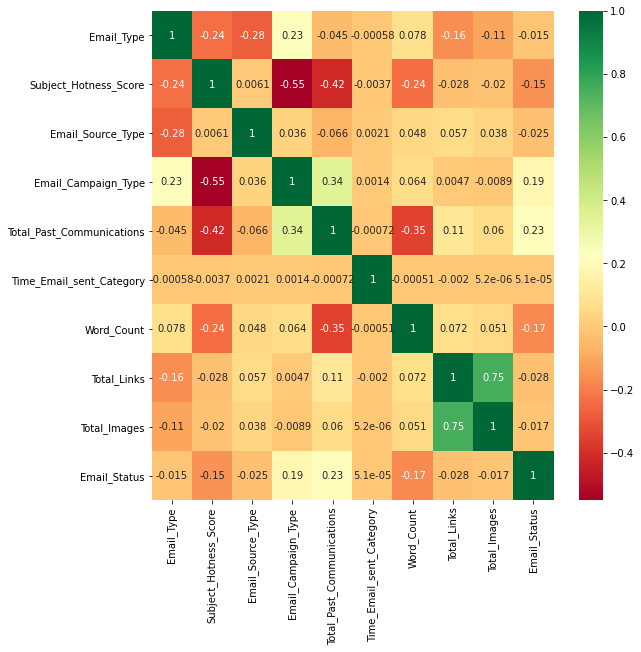

In [ ]:
import seaborn as sc

X2 = df1.iloc[:,1:7]
Y2 = df1.iloc[:,-1]

corrmat  = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(9,9))

g= sc.heatmap(df1[top_corr_features].corr(),annot = True,cmap ="RdYlGn")

X_val = df1.iloc[:,1:7]
Y_val = df1.iloc[:,-1]
Y_val = Y_val.astype('int')

#X_train,X_test,Y_train,Y_test = train_test_split(X_val,Y_val,test_size=0.35,random_state = 32)

In [ ]:
df1['links&images']=df1['Total_Links']+df1['Total_Images']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


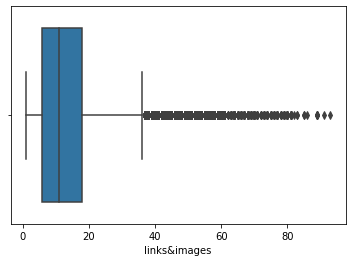

In [ ]:
sns.boxplot(df1['links&images'])

In [ ]:
df1 =df1.drop(['Total_Images'], axis = 1)

In [ ]:
df1.shape

(68353, 10)

In [ ]:
#df1 =df1.drop(['Total_Links','Total_Images'], axis = 1)
#df1.shape

In [ ]:
df1 =df1.drop(['links&images'], axis = 1)

In [ ]:
#df1['Status']=df1['Email_Status']

In [ ]:
df1.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links',
       'Email_Status'],
      dtype='object')

In [ ]:
df1.shape

(68353, 9)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Email_ID','Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']]])

,variables,VIF
0,Subject_Hotness_Score,1.773406
1,Total_Past_Communications,4.192587
2,Word_Count,3.922224
3,Total_Links,3.851532
4,Email_Status,1.296830


In [ ]:
#outliers removal using z score
z_scores = stats.zscore(df1[["Subject_Hotness_Score","Total_Past_Communications","Word_Count","Total_Links"]])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.85).all(axis=1)
df2 = df1[filtered_entries]

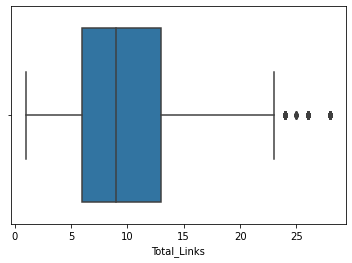

In [ ]:
sns.boxplot(x=df2["Total_Links"])

In [ ]:
df2.shape

(66237, 9)

In [ ]:
#df1 =df1.drop(['Email_Status'], axis = 1)
#df1.columns

In [ ]:
y_col = df1.Email_Status
print(y_col.shape)
#df1.corr()
df1.nunique()

(68353,)


Email_Type                     2
Subject_Hotness_Score         51
Email_Source_Type              2
Email_Campaign_Type            3
Total_Past_Communications     64
Time_Email_sent_Category       3
Word_Count                   151
Total_Links                   37
Email_Status                   3
dtype: int64

In [ ]:
new_df = pd.get_dummies(new_df, columns= categorical_features, prefix=["Email_Type", "Source","Campaign","Time_Sent"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(df2.iloc[:,0:-1], df2['Email_Status'], test_size = 0.2, random_state = 3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
print("Before OverSampling, counts of label '0': {}".format(sum(df1['Email_Status'] == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(df1['Email_Status'] == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(df1['Email_Status'] == 2)))

Before OverSampling, counts of label '0': 54941
Before OverSampling, counts of label '1': 11039 

Before OverSampling, counts of label '2': 2373 



In [ ]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

# fit predictor and target variable
sm = SMOTE(random_state = 2)
x_smote, y_smote = sm.fit_resample(X_train_norm, Y_train)

print('Original dataset shape', len(df2))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 66237
Resampled dataset shape 127776


In [ ]:
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of x_smote: {}'.format(x_smote.shape))
print('After OverSampling, the shape of y_smote: {} \n'.format(y_smote.shape))
  
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_smote == 2)))

After OverSampling, the shape of x_smote: (127776, 8)
After OverSampling, the shape of y_smote: (127776,) 

After OverSampling, counts of label '0': 42592
After OverSampling, counts of label '1': 42592
After OverSampling, counts of label '2': 42592


In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score,precision_score

In [ ]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# fit model no training data
model1 = XGBClassifier(booster='dart', max_depth=30)
model1.fit(x_smote, y_smote)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions for test data
y_pred = model1.predict(X_test_norm)
predictions = [round(value) for value in y_pred]

In [ ]:
# Training accuracy
accuracy_score(y_smote, model1.predict(x_smote))

0.9988182444277486

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# evaluate predictions
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.72%


In [ ]:
precision_score(Y_test,y_pred,average='weighted')

0.7524871950816463

In [ ]:
recall_score(Y_test,y_pred,average='weighted')

0.6111865942028986

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[9772,  750,  131],
       [1504,  488,  126],
       [ 313,  128,   36]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,y_pred))
pd.crosstab(Y_test,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     10653
           1       0.36      0.23      0.28      2118
           2       0.12      0.08      0.09       477

    accuracy                           0.78     13248
   macro avg       0.44      0.41      0.42     13248
weighted avg       0.74      0.78      0.75     13248



col_0,0,1,2
Email_Status,,,
0,9772,750,131
1,1504,488,126
2,313,128,36


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(Y_test, y_pred, average='weighted')

0.6626964379290876

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBoost
xgb_model = XGBClassifier(learning_rate=0.1,objective='multi:softmax')

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)


xgb_random.fit(x_smote,y_smote)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=  15.4s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.4s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=  15.1s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=  15.1s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=  15.1s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=  15.2s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=40, max_depth=4, total=  15.4s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=40, max_depth=4, total=  15.2s
[CV] n_estimators=80, min_samples_split=150, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 15.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softmax',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depr

In [ ]:
#The best esitmators
xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, min_samples_leaf=40, min_samples_split=50,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
#Building optimal model on the best estimators
xgb_optimal_model = xgb_random.best_estimator_

In [ ]:
# make predictions for test data
y_pred_xgbr = xgb_optimal_model.predict(X_test_norm)

In [ ]:
# Training accuracy
accuracy_score(y_smote, xgb_optimal_model.predict(x_smote))*100

79.75519659403957

In [ ]:
#evaluate predictions
accuracy_xgbr = accuracy_score(Y_test, y_pred_xgbr)
print("Accuracy: %.2f%%" % (accuracy_xgbr * 100.0))

print("Precision:", precision_score(Y_test,y_pred_xgbr,average='weighted')*100)

print("Recall:",recall_score(Y_test,y_pred_xgbr,average='weighted')*100)

Accuracy: 77.74%
Precision: 76.12468748906888
Recall: 77.74003623188406


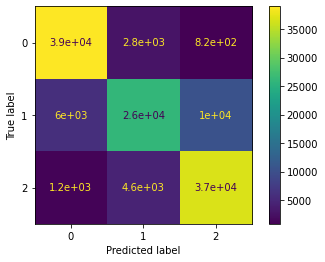

In [ ]:
#For train
plot_confusion_matrix(xgb_optimal_model,x_smote,y_smote)

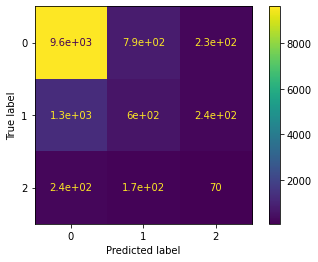

In [ ]:
#For test
plot_confusion_matrix(xgb_optimal_model,X_test_norm,Y_test)

In [ ]:
confusion_matrix(y_pred_xgbr, Y_test)

array([[9626, 1272,  240],
       [ 793,  603,  167],
       [ 234,  243,   70]])

In [ ]:
print(classification_report(Y_test,y_pred_xgbr))
pd.crosstab(Y_test,y_pred_xgbr)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10653
           1       0.39      0.28      0.33      2118
           2       0.13      0.15      0.14       477

    accuracy                           0.78     13248
   macro avg       0.46      0.45      0.45     13248
weighted avg       0.76      0.78      0.77     13248



col_0,0,1,2
Email_Status,,,
0,9626,793,234
1,1272,603,243
2,240,167,70


In [ ]:
f1_score(Y_test, y_pred_xgbr, average='weighted')

0.7677299850867761

## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_smote, y_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = classifier.predict(X_test_norm)

In [ ]:
accuracy_score(y_pred_knn, Y_test)

0.6111865942028986

In [ ]:
# evaluate predictions
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
print("Accuracy: %.2f%%" % (accuracy_knn * 100.0))

Accuracy: 61.12%


In [ ]:
print("Precision:", precision_score(Y_test,y_pred_knn,average='weighted')*100)


Precision: 75.24871950816463


In [ ]:
print("Recall:",recall_score(Y_test,y_pred_knn,average='weighted')*100)

Recall: 61.11865942028986


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,plot_confusion_matrix,roc_auc_score

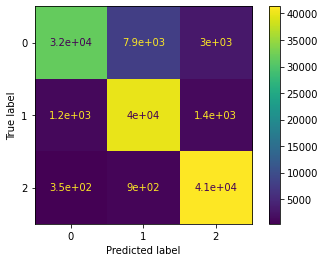

In [ ]:
#For training data
plot_confusion_matrix(classifier,x_smote,y_smote)

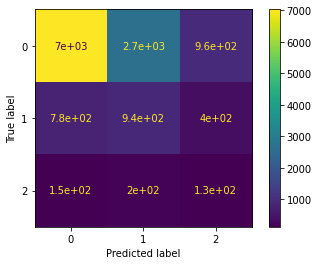

In [ ]:
#For test
plot_confusion_matrix(classifier,X_test_norm,Y_test)

In [ ]:
confusion_matrix(y_pred_knn, Y_test)

array([[7029,  784,  149],
       [2666,  936,  196],
       [ 958,  398,  132]])

In [ ]:
print(classification_report(Y_test,y_pred_knn))
pd.crosstab(Y_test,y_pred_knn)

              precision    recall  f1-score   support

           0       0.88      0.66      0.76     10653
           1       0.25      0.44      0.32      2118
           2       0.09      0.28      0.13       477

    accuracy                           0.61     13248
   macro avg       0.41      0.46      0.40     13248
weighted avg       0.75      0.61      0.66     13248



col_0,0,1,2
Email_Status,,,
0,7029,2666,958
1,784,936,398
2,149,196,132


In [ ]:
f1_score(Y_test, y_pred_knn, average='weighted')

0.6626964379290876

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_norm, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# make predictions for test data
y_pred_rf = classifier.predict(X_test_norm)

In [ ]:
# Training accuracy
accuracy_score(Y_train, classifier.predict(X_train_norm))*100

97.63158391364244

In [ ]:
#evaluate predictions
accuracy_rf = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))

Accuracy: 61.12%


In [ ]:
print("Precision:", precision_score(Y_test,y_pred_rf,average='weighted')*100)

Precision: 74.16203508266067


In [ ]:
print("Recall:",recall_score(Y_test,y_pred_rf,average='weighted')*100)

Recall: 79.33272946859904


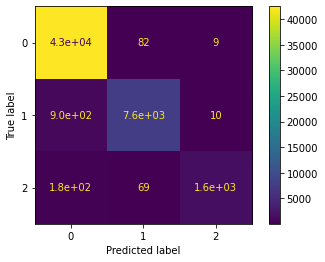

In [ ]:
#For train
plot_confusion_matrix(classifier,X_train_norm,Y_train)

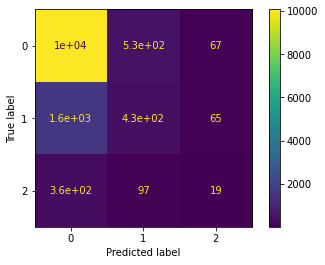

In [ ]:
#For test
plot_confusion_matrix(classifier,X_test_norm,Y_test)

In [ ]:
print(classification_report(Y_test,y_pred_rf))
pd.crosstab(Y_test,y_pred_rf)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     10653
           1       0.41      0.20      0.27      2118
           2       0.13      0.04      0.06       477

    accuracy                           0.79     13248
   macro avg       0.46      0.40      0.41     13248
weighted avg       0.74      0.79      0.76     13248



col_0,0,1,2
Email_Status,,,
0,10060,526,67
1,1622,431,65
2,361,97,19


In [ ]:
f1_score(Y_test, y_pred_rf, average='weighted')

0.7584781241901525

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

In [ ]:
#Random search
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)

In [ ]:
rf_random.fit(X_train_norm,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8, total=   2.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8, total=   2.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8, total=   2.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8, total=   2.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8, total=   2.1s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   0.9s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   0.9s
[CV] n_estimators=50, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
#The best esitmators
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_

In [ ]:
# make predictions for test data
y_pred_r = rf_optimal_model.predict(X_test_norm)

In [ ]:
#Training accuracy
accuracy_score(Y_train, rf_optimal_model.predict(X_train_norm))*100

81.34707203381834

In [ ]:
# evaluate predictions
accuracy_r = accuracy_score(Y_test, y_pred_r)
print("Accuracy: %.2f%%" % (accuracy_r * 100.0))

Accuracy: 81.29%


In [ ]:
print("Precision:", precision_score(Y_test,y_pred_r,average='weighted')*100)

Precision: 75.37534138826236


In [ ]:
print("Recall:",recall_score(Y_test,y_pred_r,average='weighted')*100)

Recall: 81.28774154589372


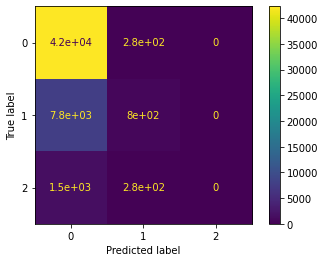

In [ ]:
#For train
plot_confusion_matrix(rf_optimal_model,X_train_norm,Y_train)

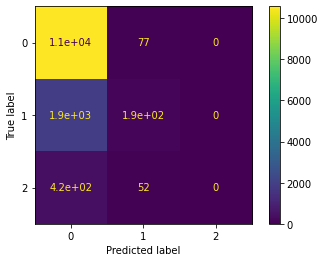

In [ ]:
#For test
plot_confusion_matrix(rf_optimal_model,X_test_norm,Y_test)

In [ ]:
print(classification_report(Y_test,y_pred_r))
pd.crosstab(Y_test,y_pred_r)

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     10653
           1       0.60      0.09      0.16      2118
           2       0.00      0.00      0.00       477

    accuracy                           0.81     13248
   macro avg       0.47      0.36      0.35     13248
weighted avg       0.75      0.81      0.75     13248



col_0,0,1
Email_Status,,
0,10576,77
1,1925,193
2,425,52


In [ ]:
f1_score(Y_test, y_pred_r, average='weighted')

0.7466441163103285

## Neural Network

In [ ]:
# DNN
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# DNN (fit and validation)
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_smote, y_smote)).shuffle(len(x_smote)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_test_norm, Y_test)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
250/250 [==============================] - 5s 19ms/step - loss: 1.3992 - accuracy: 0.4348 - val_loss: 0.8920 - val_accuracy: 0.6245
Epoch 2/20
250/250 [==============================] - 4s 17ms/step - loss: 0.9565 - accuracy: 0.5399 - val_loss: 0.9219 - val_accuracy: 0.6130
Epoch 3/20
250/250 [==============================] - 4s 17ms/step - loss: 0.9291 - accuracy: 0.5517 - val_loss: 0.7803 - val_accuracy: 0.6807
Epoch 4/20
250/250 [==============================] - 4s 17ms/step - loss: 0.9106 - accuracy: 0.5599 - val_loss: 0.7918 - val_accuracy: 0.6655
Epoch 5/20
250/250 [==============================] - 4s 17ms/step - loss: 0.8935 - accuracy: 0.5663 - val_loss: 0.8289 - val_accuracy: 0.6293
Epoch 6/20
250/250 [==============================] - 4s 17ms/step - loss: 0.8767 - accuracy: 0.5743 - val_loss: 0.8127 - val_accuracy: 0.6417
Epoch 7/20
250/250 [==============================] - 4s 17ms/step - loss: 0.8642 - accuracy: 0.5821 - val_loss: 0.8187 - val_accuracy: 0.6141

In [ ]:
y_pred_nn = model.predict_classes(val_ds)

In [ ]:
y_pred_nn

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
f1_score(Y_test, y_pred_nn, average='weighted')

0.6801131668211853